In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:

df = pd.read_csv('/content/final_dataset.csv', parse_dates=['Date'], index_col=['Date'])
df = df.drop('Unnamed: 0', axis=1)
df.head()

,BTC price [USD],Volume BTC,Gold price[USD],Oil WTI price[USD],SP500 close index,BTC n-transactions,BTC google search interest,VIX Close
Date,,,,,,,,
2014-12-01,370.0,0.06,1332.5,68.98,2053.44,79098.0,3,14.29
2014-12-02,378.0,15.01,1314.7,66.99,2066.55,99419.0,3,12.85
2014-12-03,378.0,0.55,1325.8,67.30,2074.33,99419.0,3,12.47
2014-12-04,377.1,0.01,1324.2,66.73,2071.92,99419.0,3,12.38
2014-12-05,377.1,0.00,1310.8,65.89,2075.37,90900.0,3,11.82


In [6]:
df.describe()

,BTC price [USD],Volume BTC,Gold price[USD],Oil WTI price[USD],SP500 close index,BTC n-transactions,BTC google search interest,VIX Close
count,1365.000000,1365.000000,1365.000000,1365.000000,1365.000000,1365.000000,1365.000000,1365.000000
mean,4169.047451,12266.697355,1343.260916,51.891619,2479.272103,242169.406593,12.325275,16.412674
std,3983.986177,11281.452481,119.471181,11.083033,379.182688,80382.192997,14.523708,7.913542
min,120.000000,0.000000,1097.700000,-36.980000,1829.080000,59344.000000,2.000000,9.140000
25%,444.880000,6127.140000,1272.400000,46.210000,2102.440000,193578.000000,3.000000,12.390000
50%,3380.010000,8889.980000,1324.200000,52.010000,2459.270000,242303.000000,10.000000,14.280000
75%,7414.080000,14852.080000,1392.100000,58.840000,2793.840000,303632.000000,15.000000,17.660000
max,19039.000000,160540.990000,1768.900000,77.410000,3386.150000,439549.000000,100.000000,82.690000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1365 entries, 2014-12-01 to 2020-05-14
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   BTC price [USD]             1365 non-null   float64
 1   Volume BTC                  1365 non-null   float64
 2   Gold price[USD]             1365 non-null   float64
 3   Oil WTI price[USD]          1365 non-null   float64
 4   SP500 close index           1365 non-null   float64
 5   BTC n-transactions          1365 non-null   float64
 6   BTC google search interest  1365 non-null   int64  
 7   VIX Close                   1365 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 96.0 KB


# Plotting
**A time series plot of your data and visually check if there are any obvious trends or seasonality.**

In [16]:
viz = df.columns.tolist()
print(viz)

['BTC price [USD]', 'Volume BTC', 'Gold price[USD]', 'Oil WTI price[USD]', 'SP500 close index', 'BTC n-transactions', 'BTC google search interest', 'VIX Close']


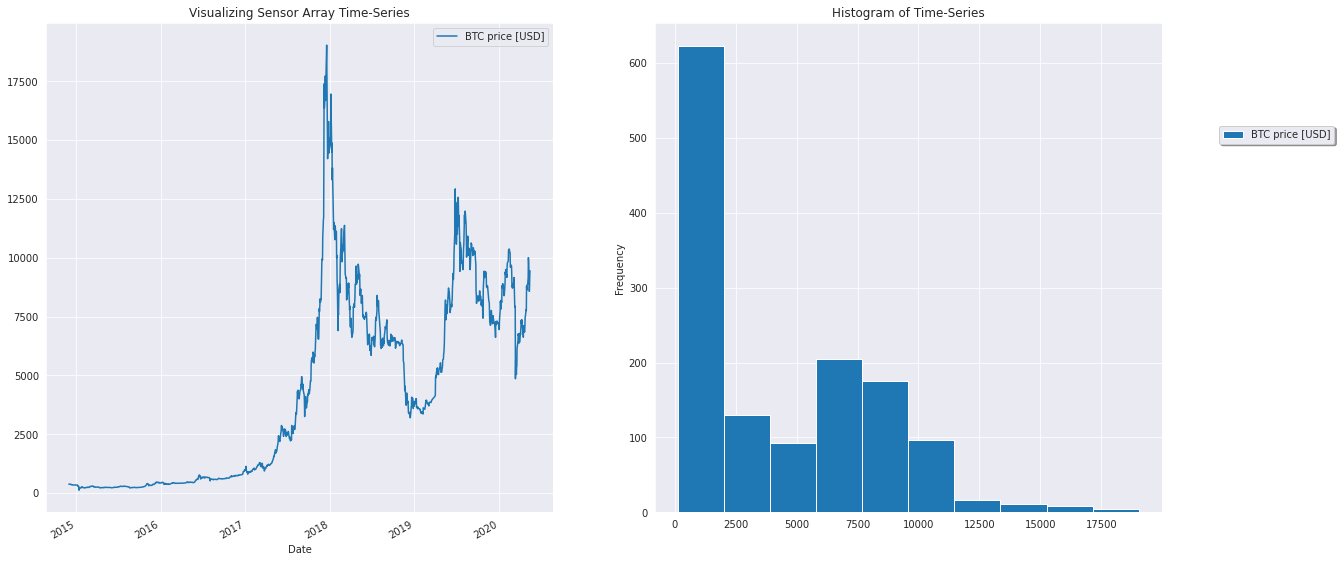

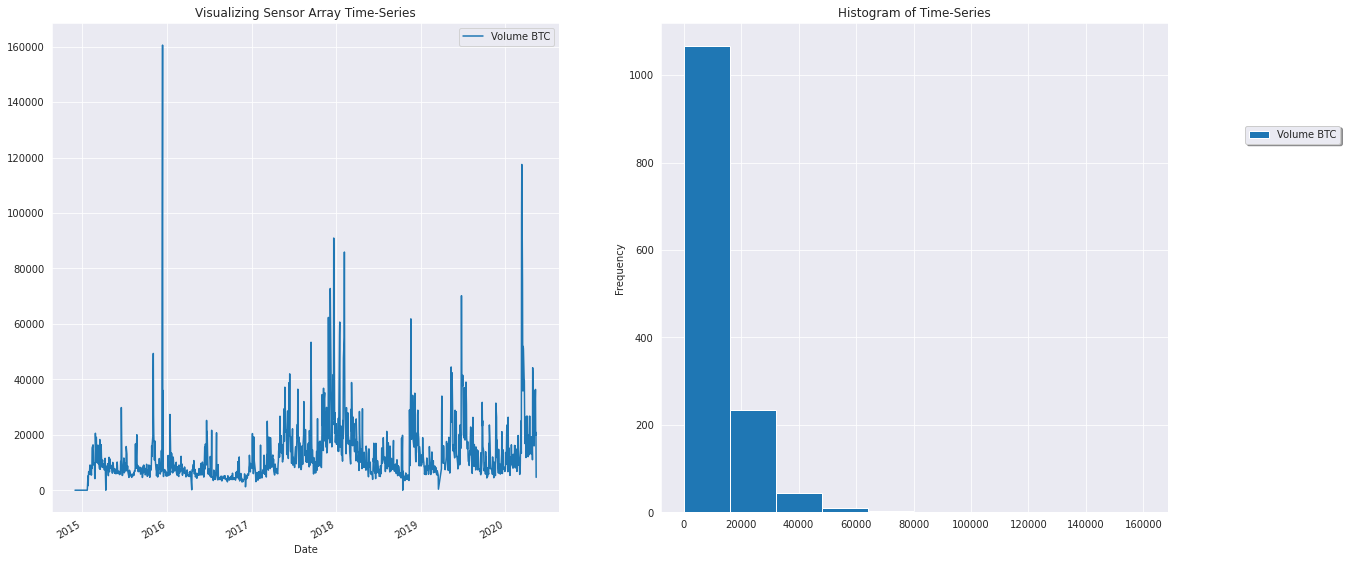

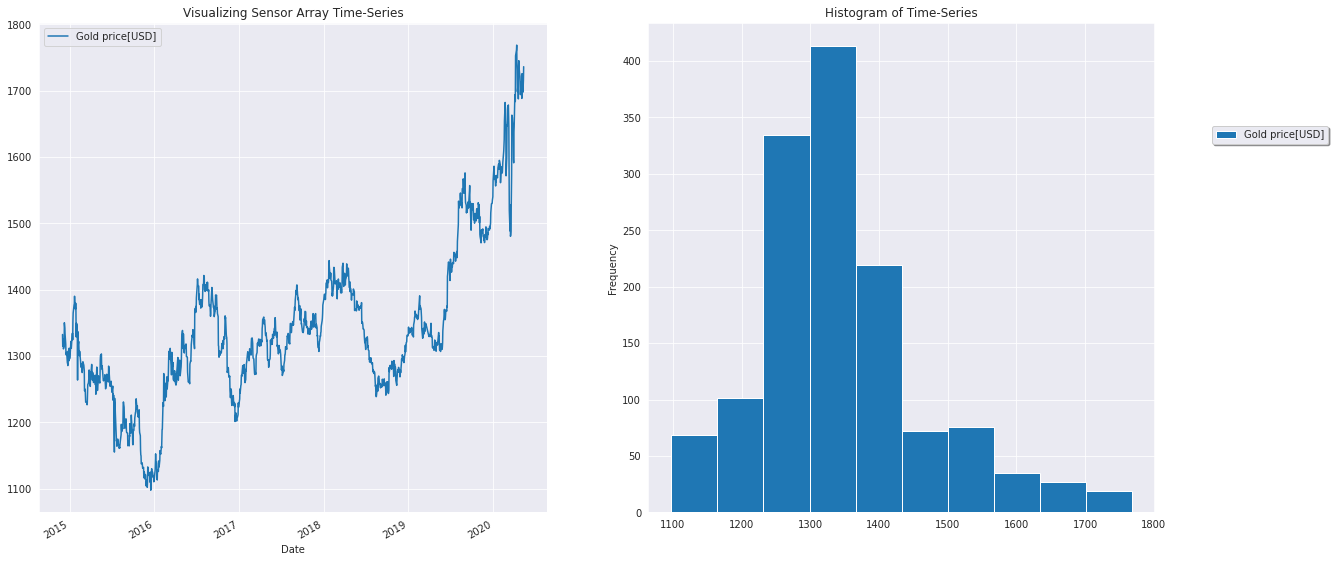

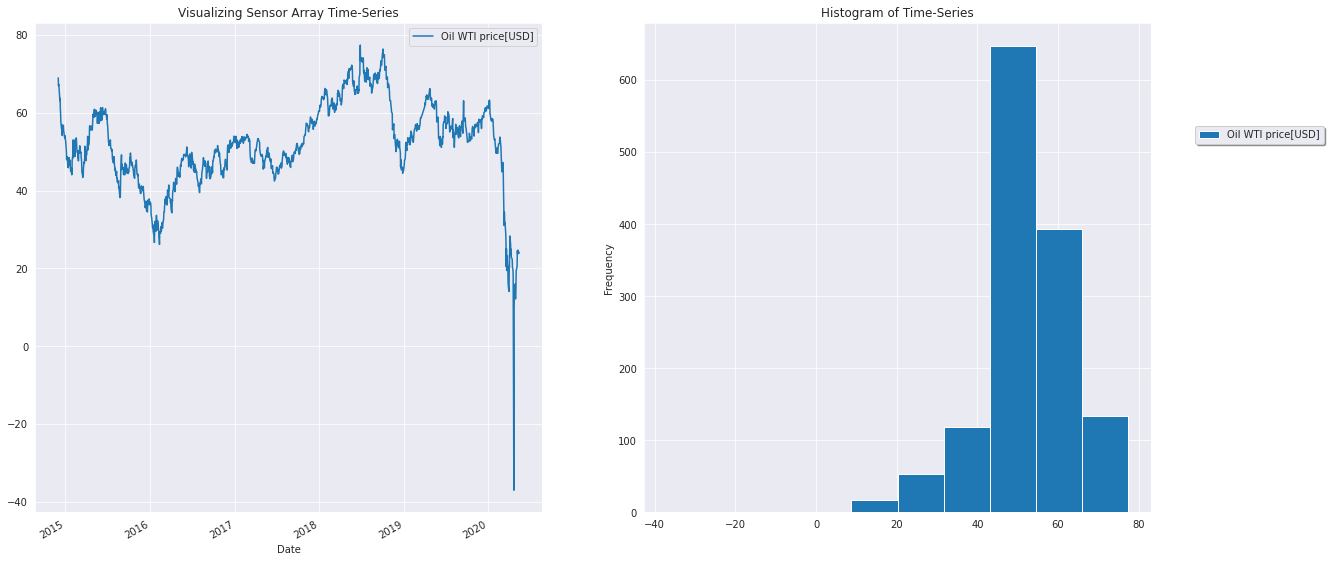

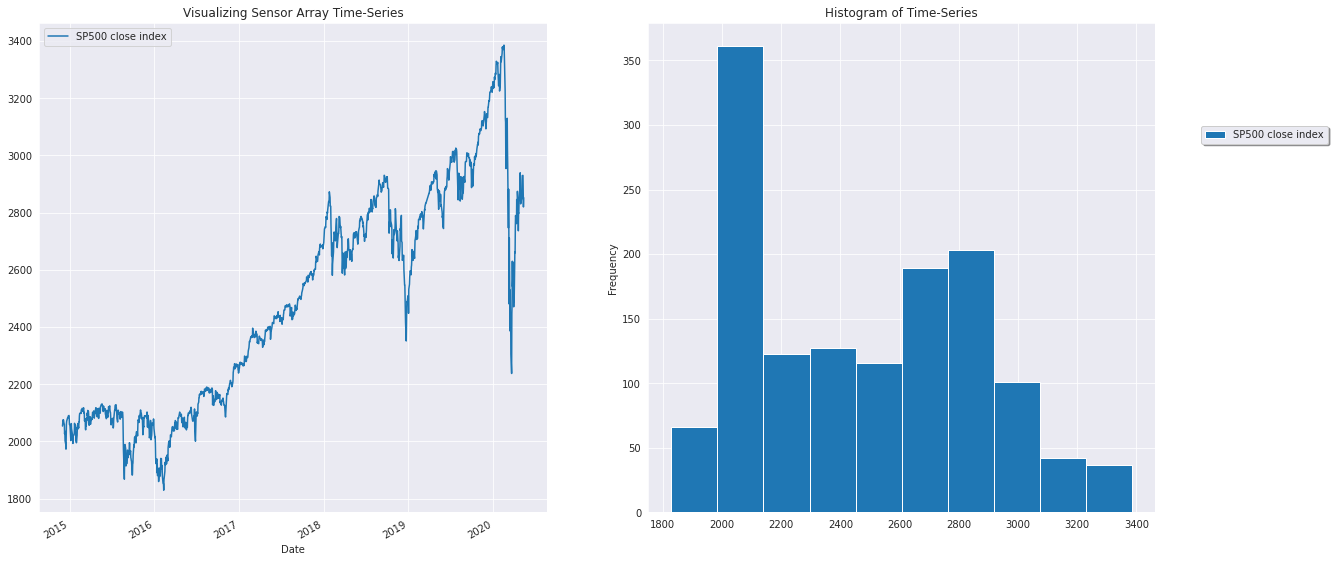

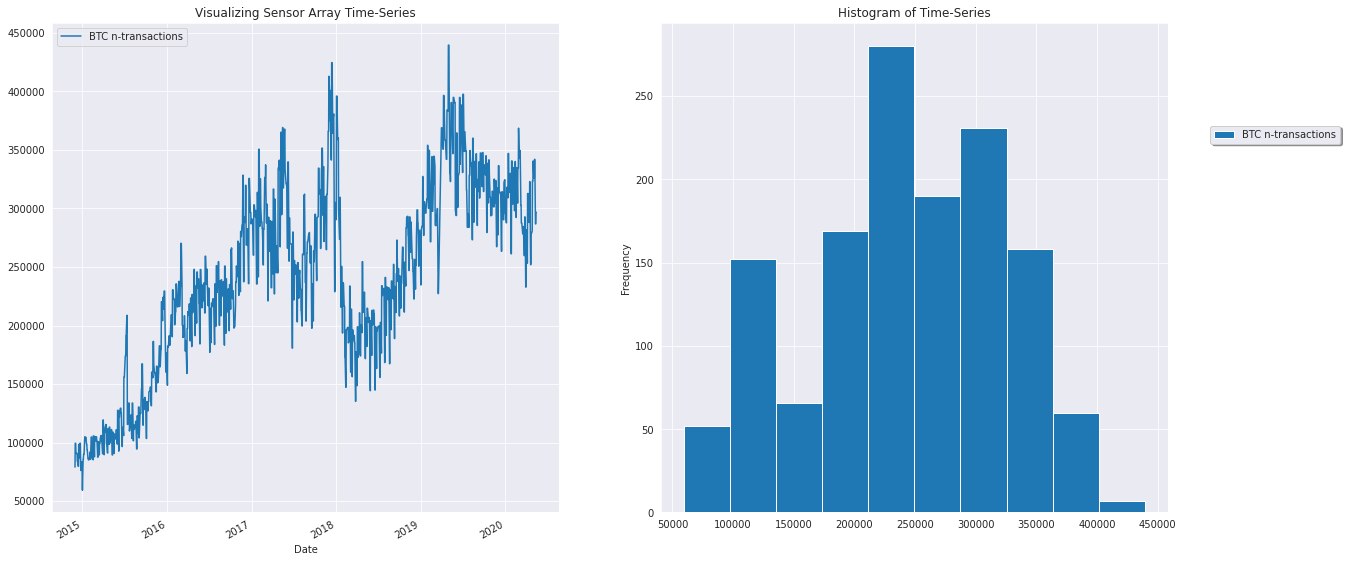

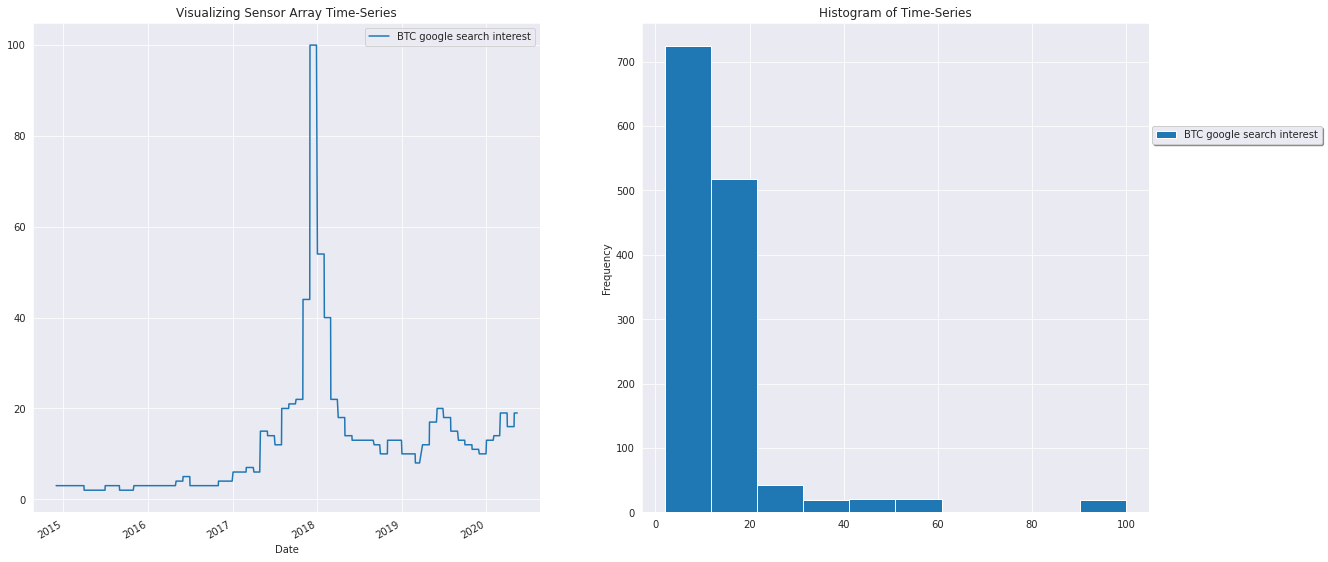

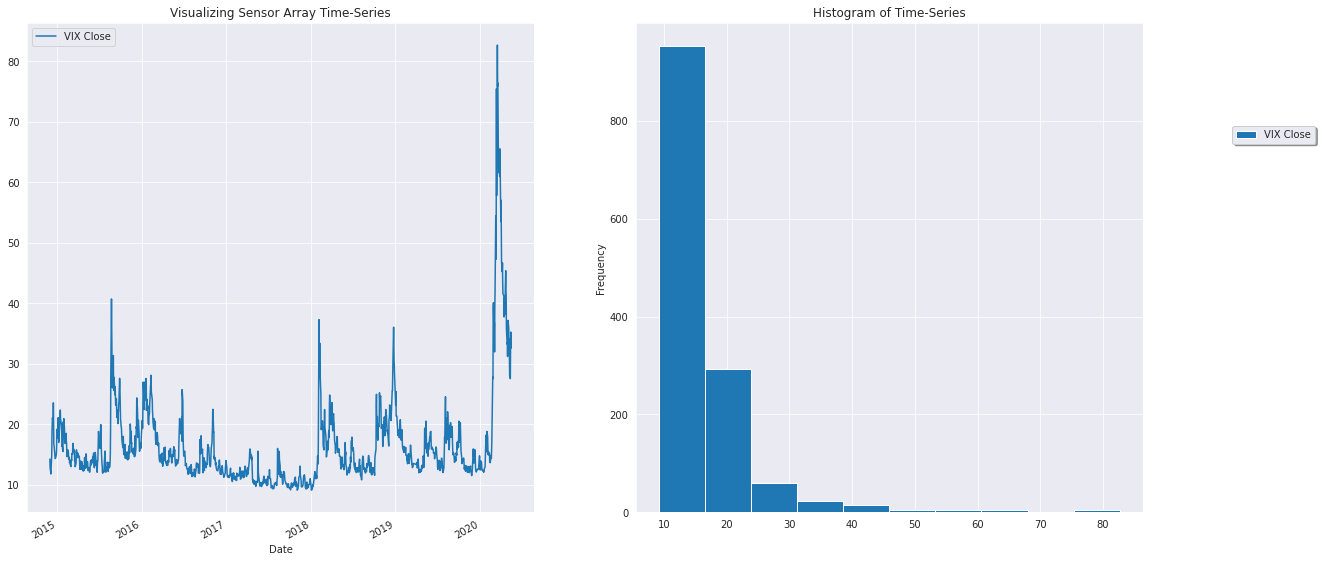

In [9]:
for i in viz:
  ds = df[[i]]
  # Visualize the trends in data
  sns.set_style('darkgrid')
  fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (20,10))
  ds.plot(kind = 'line', legend = 'reverse', title = 'Visualizing Sensor Array Time-Series', ax =ax[0])
  ds.plot(kind = 'hist', legend = 'reverse', title = 'Histogram of Time-Series', ax =ax[1])
  plt.legend(loc = 'upper right', shadow = True, bbox_to_anchor = (1.35, 0.8))
  plt.show()
  

# Lag Plot
**Lag plots are used to check if a data set or time series is random. Random data should not exhibit any structure in the lag plot. Non-random structure implies that the underlying data are not random.**

No handles with labels found to put in legend.


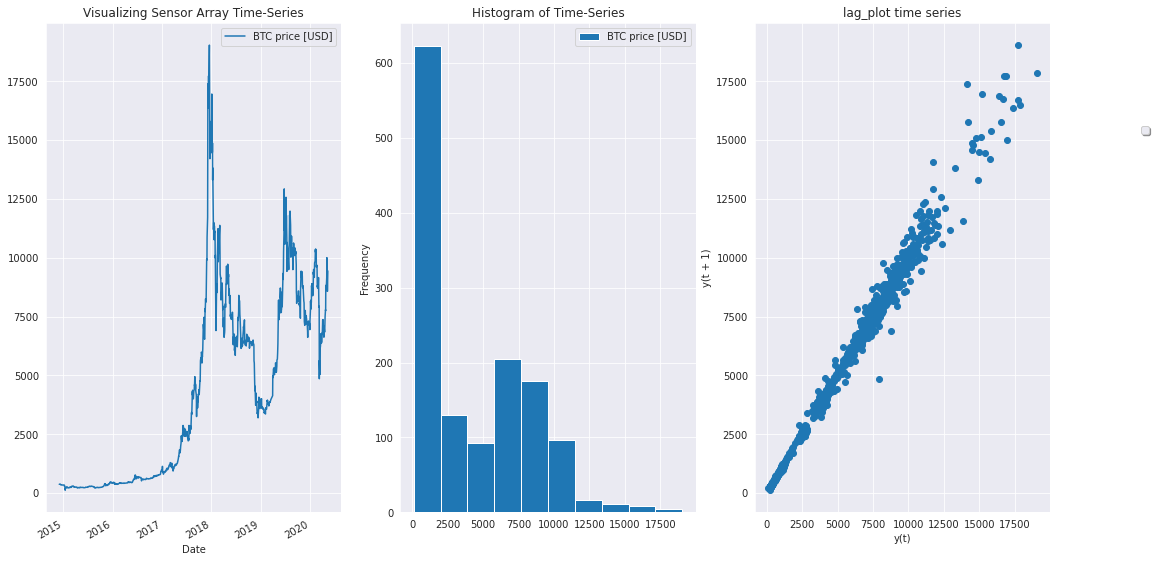

No handles with labels found to put in legend.


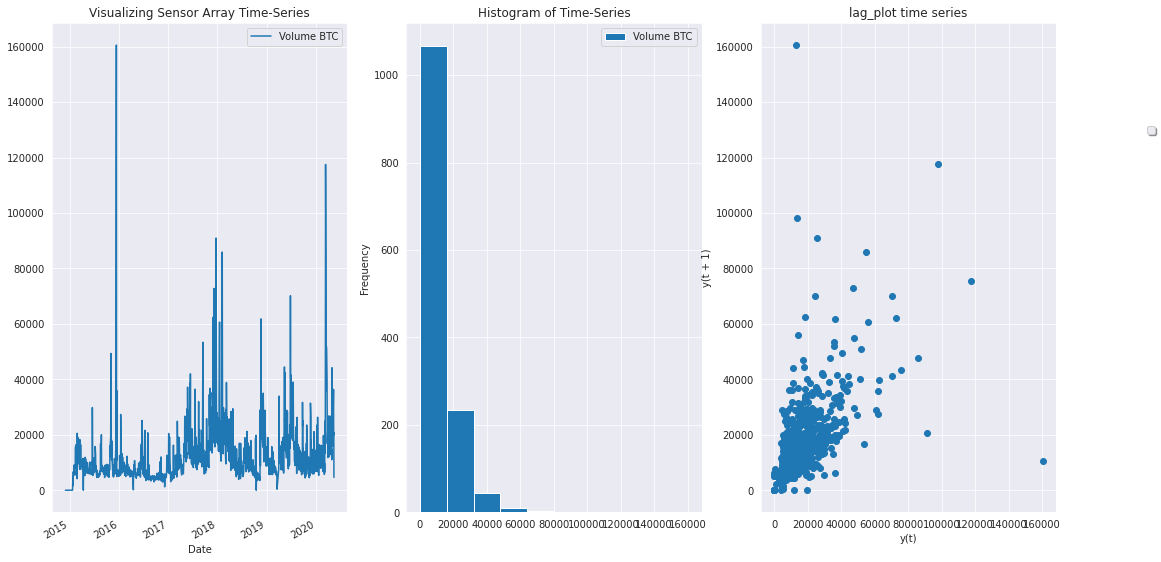

No handles with labels found to put in legend.


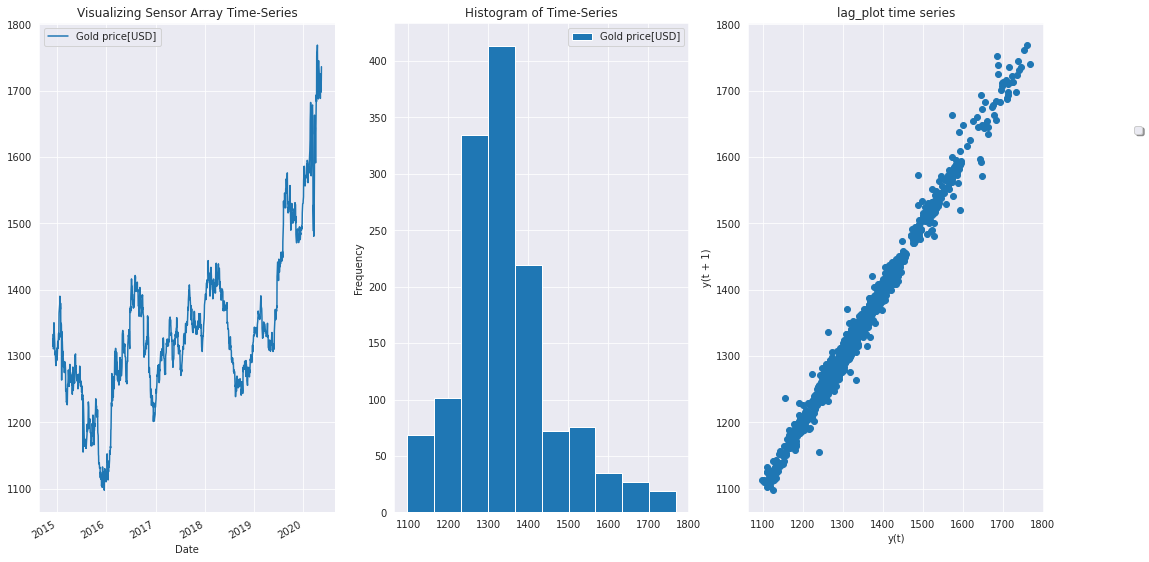

No handles with labels found to put in legend.


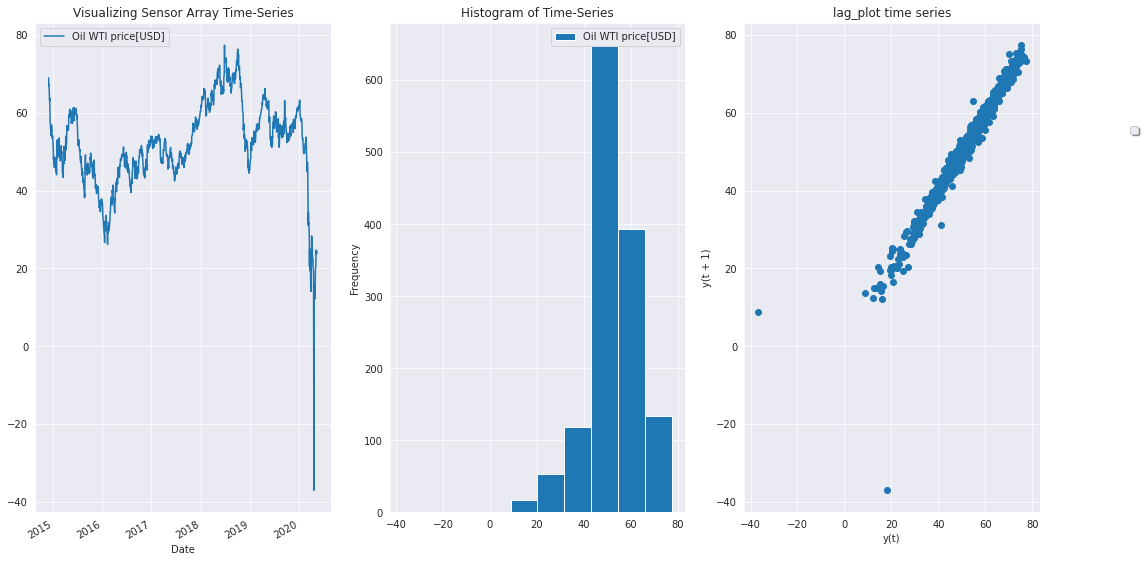

No handles with labels found to put in legend.


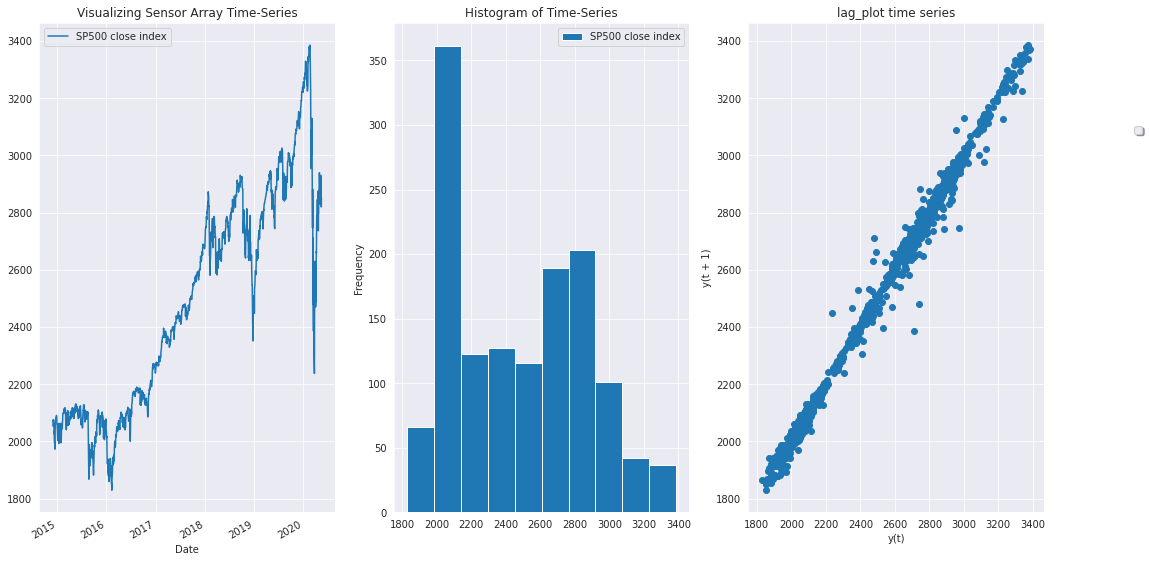

No handles with labels found to put in legend.


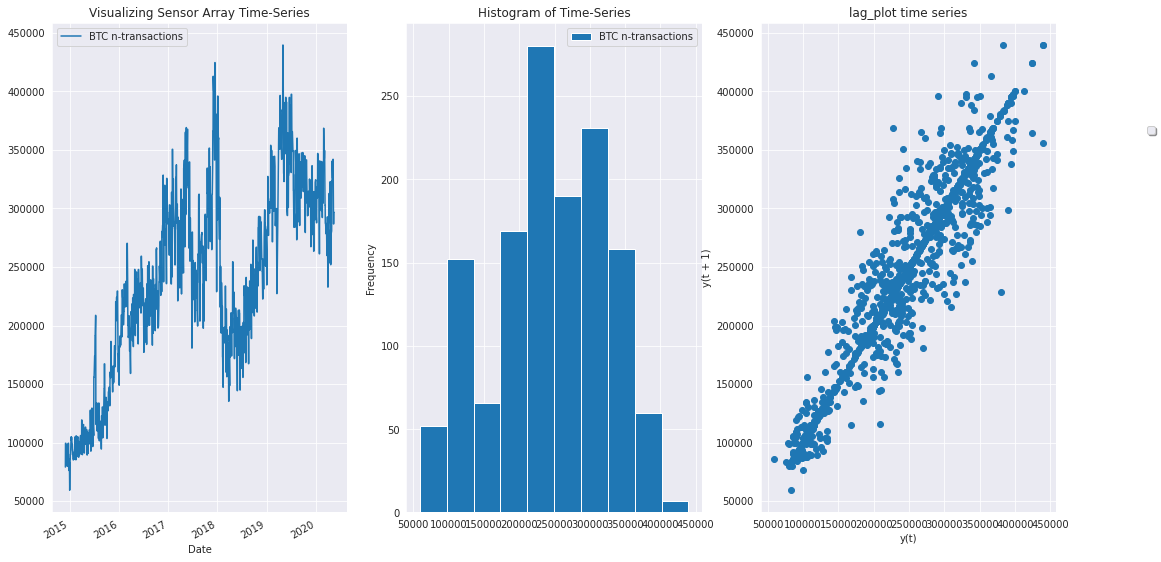

No handles with labels found to put in legend.


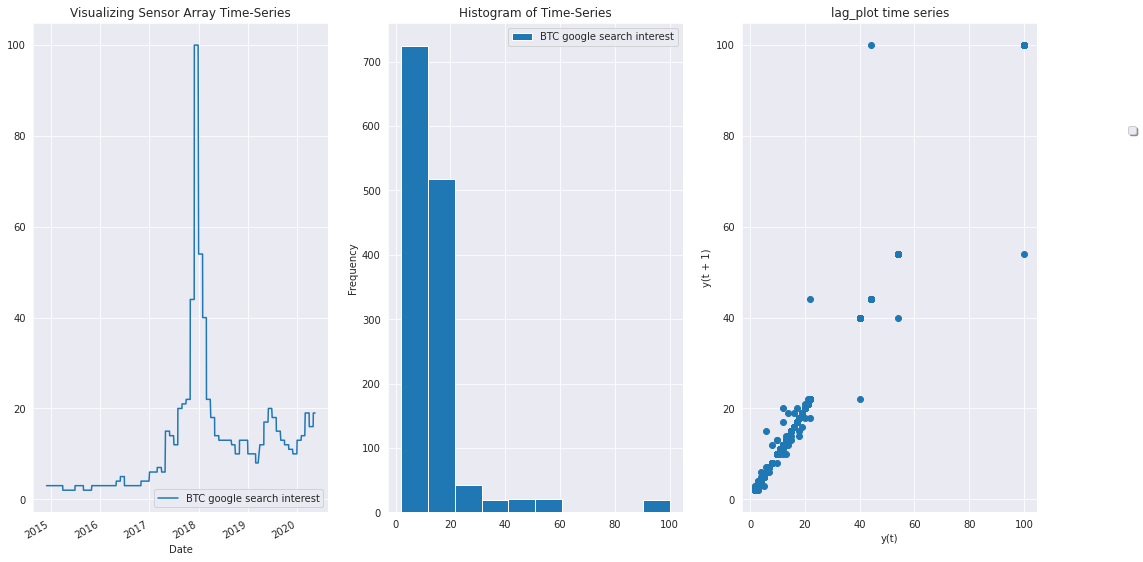

No handles with labels found to put in legend.


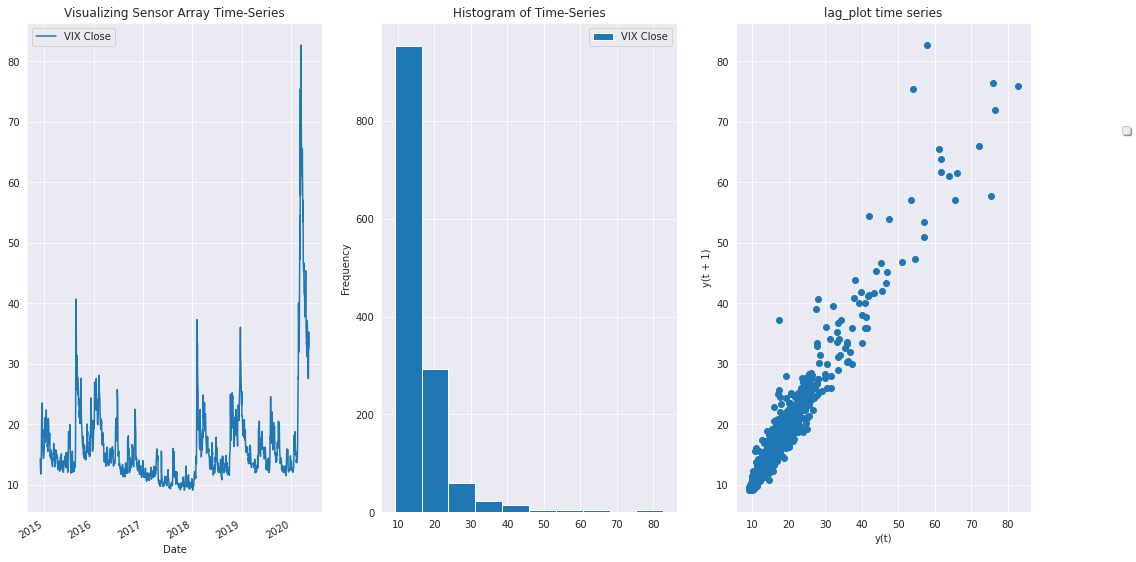

In [10]:
from pandas.plotting import lag_plot


for i in viz:
  ds = df[[i]]
  # Visualize the trends in data
  sns.set_style('darkgrid')
  fig, ax = plt.subplots(nrows=1, ncols=3, figsize = (18,10))
  ds.plot(kind = 'line', legend = 'reverse', title = 'Visualizing Sensor Array Time-Series', ax =ax[0])
  ds.plot(kind = 'hist', legend = 'reverse', title = 'Histogram of Time-Series', ax =ax[1])
  lag_plot(ds, ax = ax[2])
  ax[2].set_title('lag_plot time series');
  plt.legend(loc = 'upper right', shadow = True, bbox_to_anchor = (1.35, 0.8))
  plt.show()
  

# Statistical correlation summarizes the strength of the relationship between two variables.

* A plot of the autocorrelation of a time series by lag is called the AutoCorrelation Function, or the acronym ACF. This plot is sometimes called a correlogram or an autocorrelation plot.

* A partial autocorrelation is a summary of the relationship between an observation in a time series with observations at prior time steps with the relationships of intervening observations removed.

['BTC price [USD]']


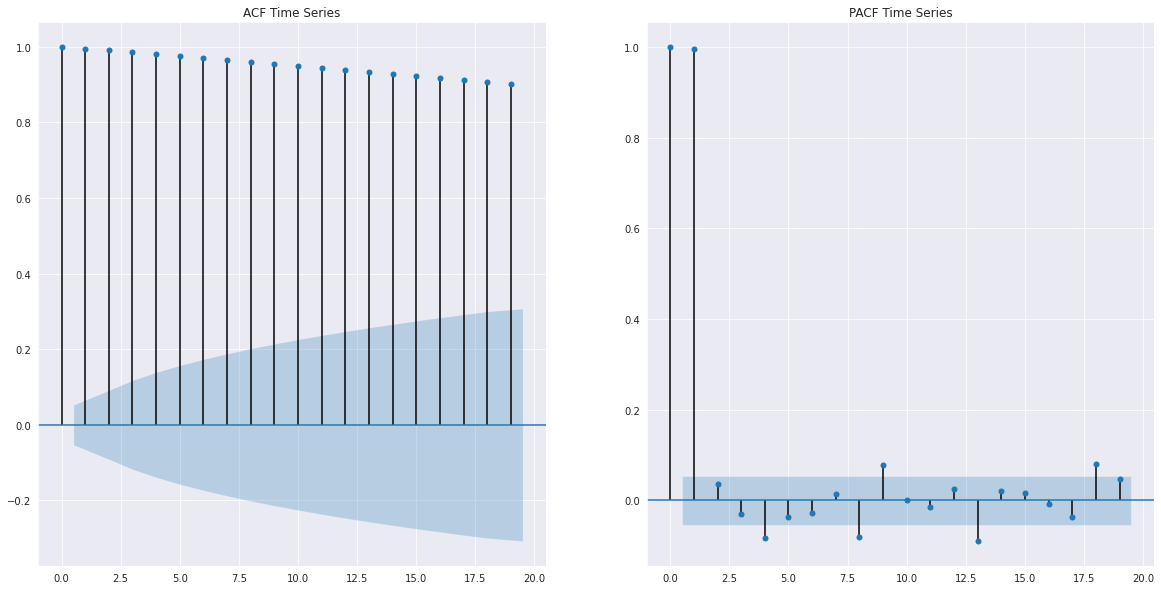

['Volume BTC']


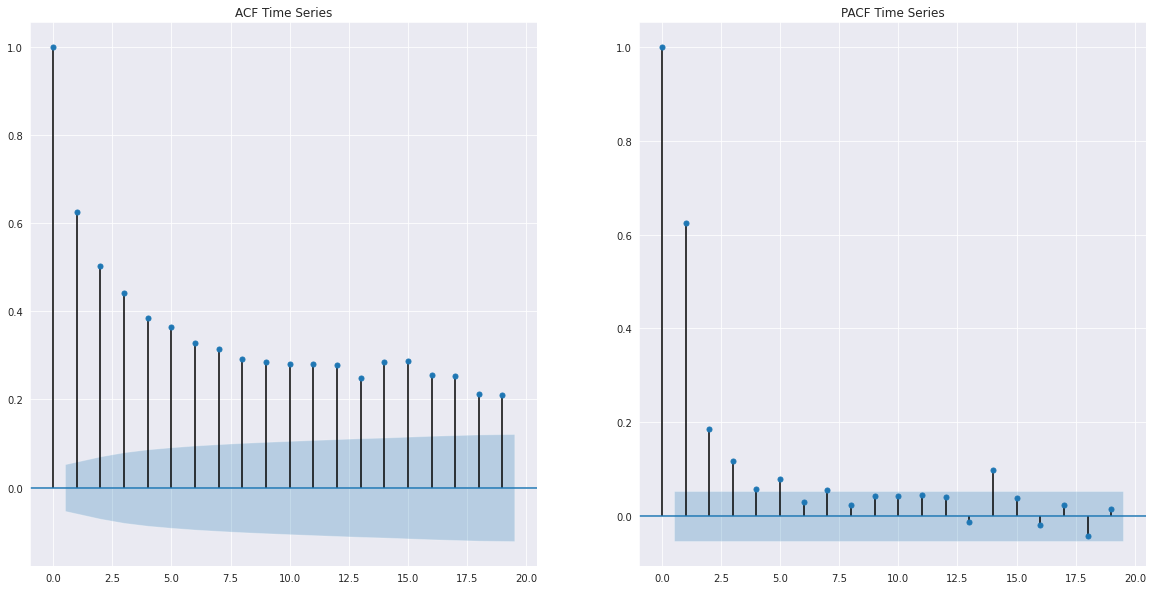

['Gold price[USD]']


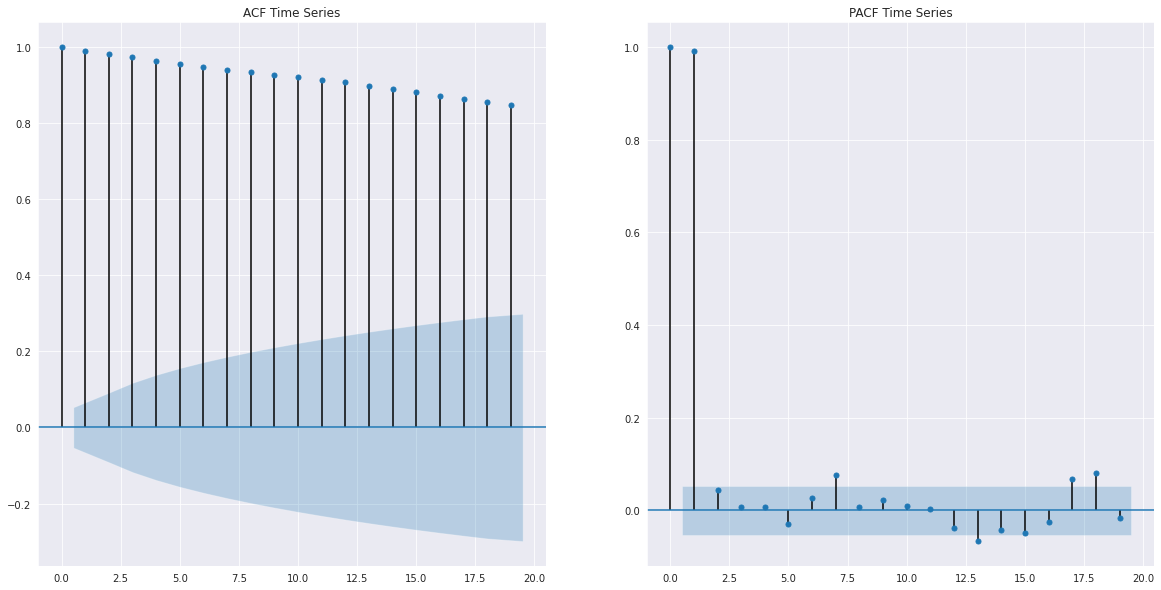

['Oil WTI price[USD]']


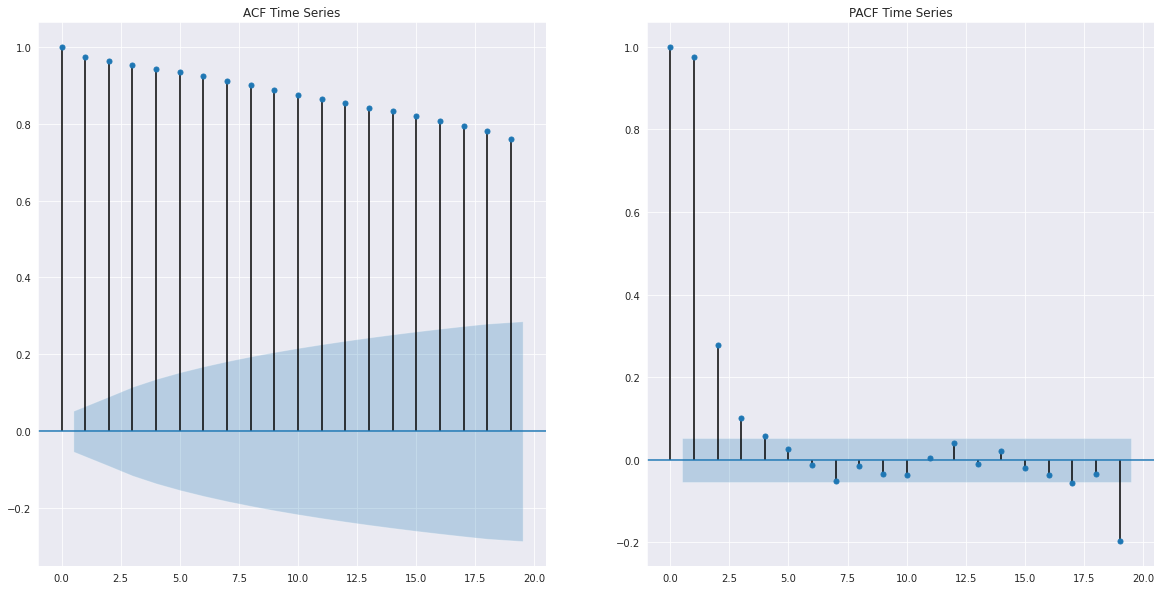

['SP500 close index']


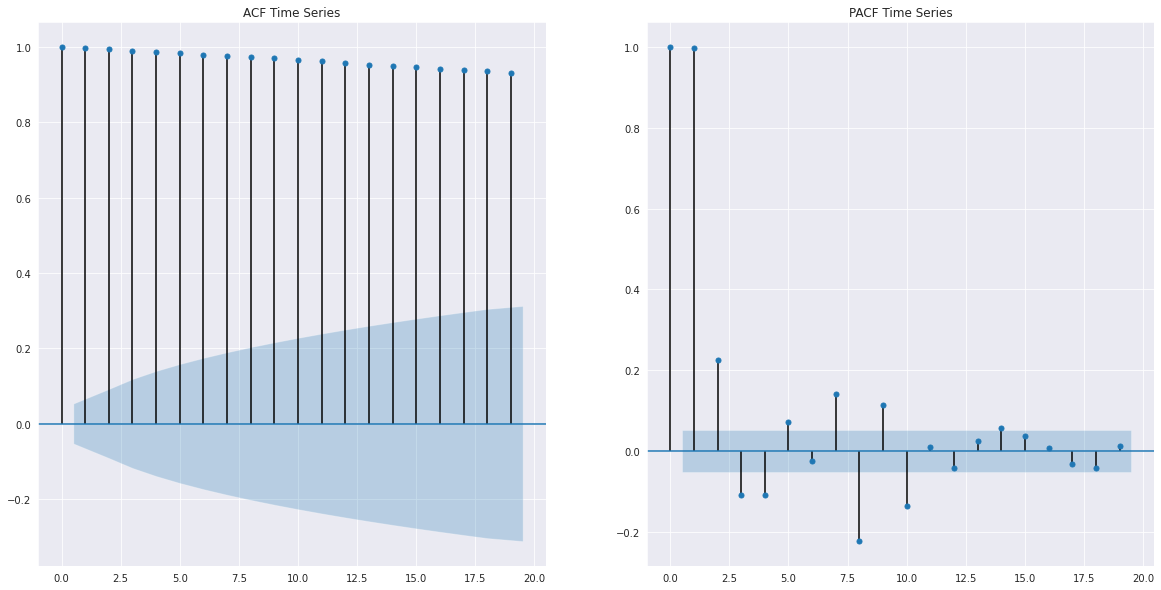

['BTC n-transactions']


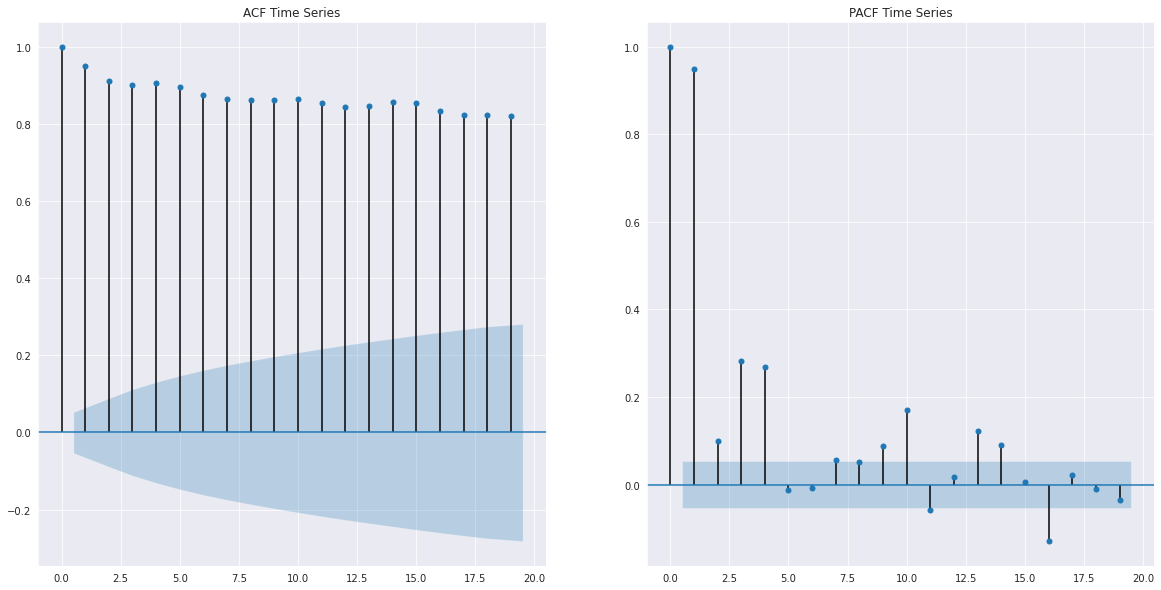

['BTC google search interest']


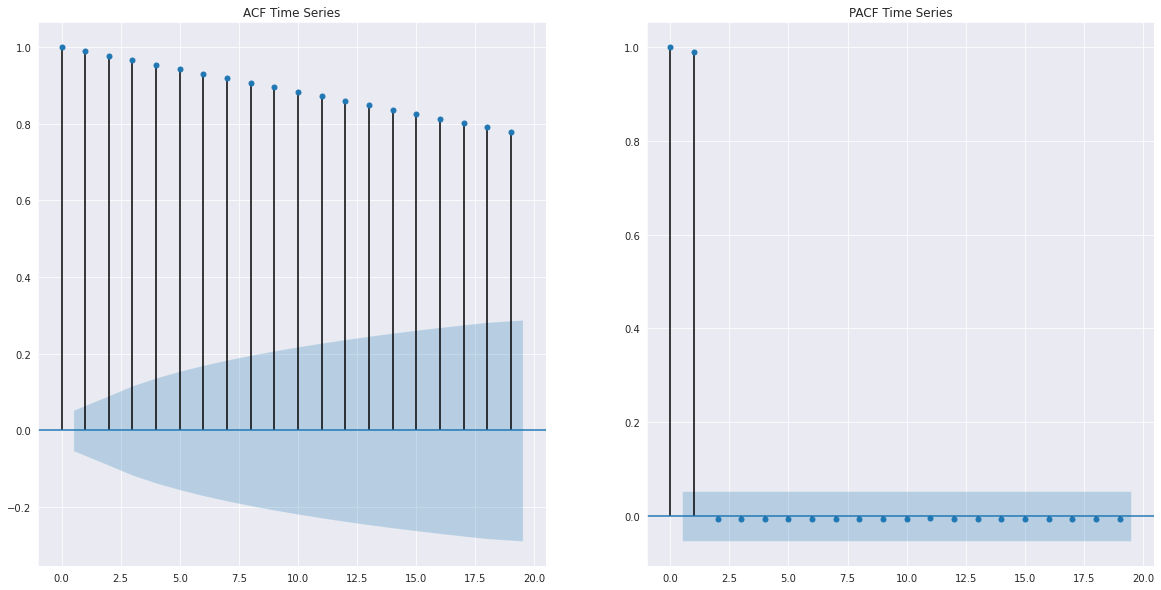

['VIX Close']


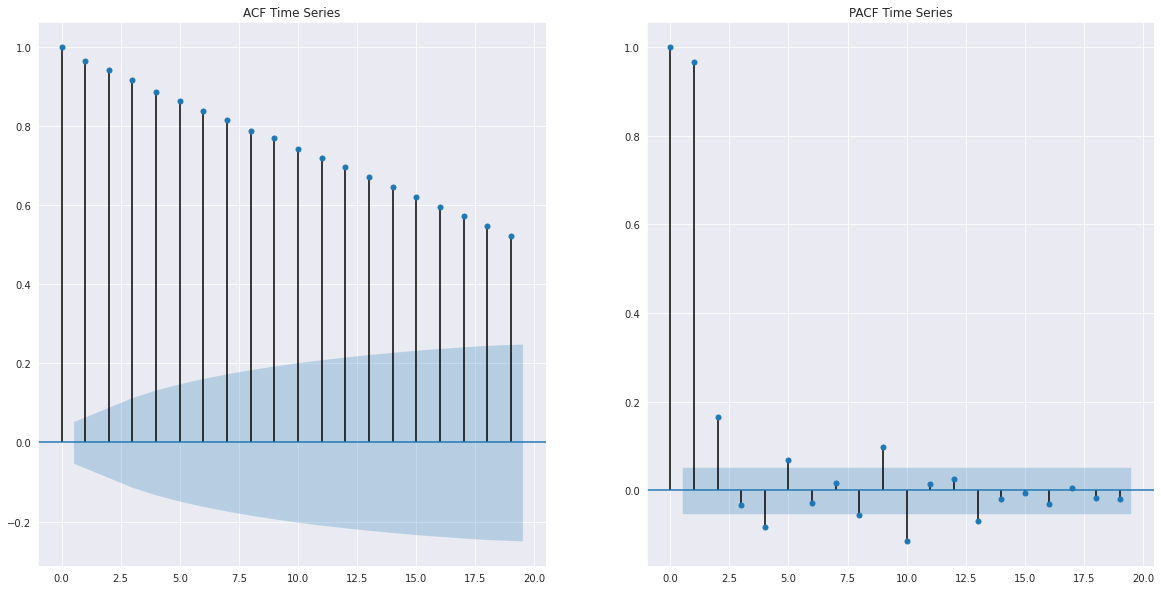

In [11]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

for i in viz:
  ds = df[[i]]
  # Visualize the trends in data
  sns.set_style('darkgrid')
  fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (20,10))
  print(ds.columns.to_list())
  plot_acf(ds, ax=ax[0], lags = range(0,20))
  ax[0].set_title('ACF Time Series')
  plot_pacf(ds, ax=ax[1], lags = range(0,20))
  ax[1].set_title('PACF Time Series')
  plt.show()

# Statistical Test to Check If Variable is Time Dependent or not

*  p-value > 0.05: Accept the null hypothesis (H0), the data has a unit root and is non-stationary.
*  p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.




In [12]:
feature_range = (0, 1)
scaler = MinMaxScaler(feature_range)

scaled_data1 = scaler.fit_transform(df)

In [13]:
scaled_data1.T[1]

array([3.73736327e-07, 9.34963712e-05, 3.42591633e-06, ...,
       1.23492075e-01, 1.29930618e-01, 2.87920238e-02])

In [17]:
from statsmodels.tsa.stattools import adfuller
for i,j in enumerate(viz):
  ds = df[[j]]
  X = scaled_data1.T[i].flatten()
  print(X)
  result = adfuller(X)
  print(f'Column name in dataset = {ds.columns}')
  print('ADF Statistic: %f' % result[0])
  print('p-value: %f' % result[1])
  print('Critical Values:')
  for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))



[0.01321423 0.01363708 0.01363708 ... 0.45993023 0.48635023 0.49268355]
Column name in dataset = Index(['BTC price [USD]'], dtype='object')
ADF Statistic: -1.600564
p-value: 0.483310
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
[3.73736327e-07 9.34963712e-05 3.42591633e-06 ... 1.23492075e-01
 1.29930618e-01 2.87920238e-02]
Column name in dataset = Index(['Volume BTC'], dtype='object')
ADF Statistic: -4.078082
p-value: 0.001053
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
[0.34982122 0.32330155 0.33983909 ... 0.90747914 0.92178188 0.95150477]
Column name in dataset = Index(['Gold price[USD]'], dtype='object')
ADF Statistic: 0.431627
p-value: 0.982640
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
[0.92630475 0.90890812 0.91161815 ... 0.5332634  0.5332634  0.5332634 ]
Column name in dataset = Index(['Oil WTI price[USD]'], dtype='object')
ADF Statistic: -2.042856
p-value: 0.268104
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
[0.14409115 0.15251081 0.15750

# Time Invariant Columns
## Volumn BTC, BTC google search interest, VIX Close

------------------------------------------------------------------------

# Time Dependent Columns
## BTC price [USD], Gold price[USD], Oil WTI price[USD], SP500 close index, BTC n-transactions